# Example: XRD spectra


In the following the usage and handling of an electronic notebook will be explained by means of a datamodel design for managing XRD data files generated by the XRD software of the spectrometer.

### Importing necessary packages

First, all the important python packages are to be imported that are required to run the application. These comprise standard libraries like `numpy` or `pathlib` that are installed in a python envirionment specially set up for this individual data model as well as modules developed in our group. The central building block here is the `DataModel` object of the `sdRDM package`, which is required to pull the data model from git and initialize it.
Besides that, additional modules such as `UXDReader` and `XRDAnalyzer` provide comfortable solutions for extracting and analyzing data. They are located in the subfolder `modules`. 

This outsourcing of modules that perform certain tasks helps maintaining a good overview of by not messing up the notebook with too much code and avoids redundancies, since they can be imported and used by different notebook simultaneously.

In [1]:
import re

from sdRDM import DataModel
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from modules.uxdreader import UXDReader
from modules.xrdplotter import XRDPlotter
from modules.xrdanalyzer import XRDAnalyzer



### Loading data model from GitHub

The data model is pulled from git and stored in the variable `model`.

In [2]:
url_XRD_showcase = "https://github.com/FAIRChemistry/XRD_showcase.git"

In [3]:
model = DataModel.from_git(url=url_XRD_showcase)

Cloning into '/tmp/tmpr18ph5u6'...


### Parsing XRD data

The class `UXDReader` of the module `UXDRreader` is called by passing in the path to the current working directory (`cwd`) and stored in the variable `reader`. The methods `extract_metadata` and `extract_data` are called by passing in the name of the file that is to be extracted. The extracted data is stored in the variables `meta_data`, which is a Python `dictionary` and `df_exp_data` respectively, a `pandas.DataFrame`, which is a spreadsheet-like format. The literature data are read in from a test file that contains the data in a white space seperated format and stored in `df_lit_data`, which is also a `pandas.DataFrame`.

In [4]:
path_to_directory = Path.cwd()
reader = UXDReader(path_to_directory)
meta_data = reader.extract_meta_data('XRD_data_set_exp')
df_exp_data = reader.extract_data('XRD_data_set_exp')
df_lit_data = pd.read_csv('XRD_data_set_lit.txt', delim_whitespace=True, names=['Angle_lit', 'Intensity_lit'])

### Feeding the data model

The data model named `Dataset` is now fed with the metadata, that are stores in the python dictionary meta_data. The individual entries are called by their `key` words. 
The hierarchical and branched structure of the data model has to be considered, which demands that the individual objects are filled with data in sequence order from bottom to top, so that no object is called that has not yet been defined.


In [5]:
SpecInf = model.SpecInf(
    wl = meta_data['WLS'],
    wl_ratio = meta_data['WLRATIO'],
    anode = meta_data['ANODE'],
    steptime = meta_data['STEPTIME'],
    stepsize = meta_data['STEPSIZE'],
    theta = meta_data['THETA'],
    start = meta_data['START'],
    theta2 = meta_data['THETA2']
)

In [6]:
Dataset = model.Dataset(
    name_exp = 'Richard Schoemig',
    date = meta_data['DATEMEASURED'],
    compound = 'Merlinoite',
    sample_id = meta_data['SAMPLE'],
    spec_inf = SpecInf
)

The content of the data model can be shown by using `yaml`.

In [7]:
#print(Dataset.yaml())

 ### Plotting the data

A diffractrogram can be generated using the module UXDPlotter by passing in `df_exp_data`, which holds the experimental data along with `df_lit_data` to simultaneously plot the literature diffractrogram in order to compare and evaluate the results.

      Angle_exp  Intensity_exp  Angle_lit  Intensity_lit
0        5.0000           1645       5.00          408.0
1        5.0153           1681       5.02          408.0
2        5.0305           1638       5.04          408.0
3        5.0458           1671       5.06          408.0
4        5.0610           1673       5.08          408.0
...         ...            ...        ...            ...
3273    54.9424           1036        NaN            NaN
3274    54.9576            990        NaN            NaN
3275    54.9729           1069        NaN            NaN
3276    54.9882           1102        NaN            NaN
3277    55.0034           1094        NaN            NaN

[3278 rows x 4 columns]


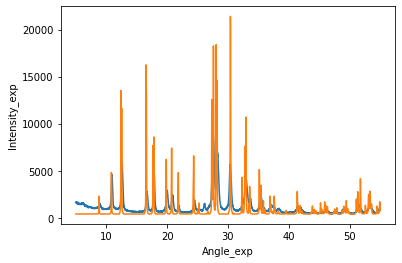

In [8]:
plotter = XRDPlotter(df_exp_data, df_lit_data)
xrdplot = plotter.plotting()


### Analysis

The `XRDAnalyzer` module allows fitting the XRD spectrum with a set of Gaussian/Cauchy-Lorentz distributions or Voigt profile distributions, which is the result from a convolution of the former two. 

model_indices: [0]
peak_index: 2 model_index: 0
ax1: AxesSubplot(0.125,0.125;0.775x0.755)


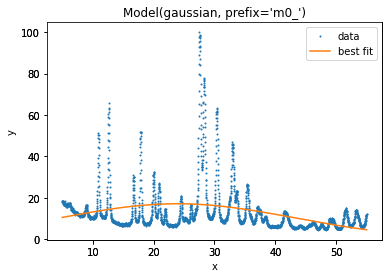

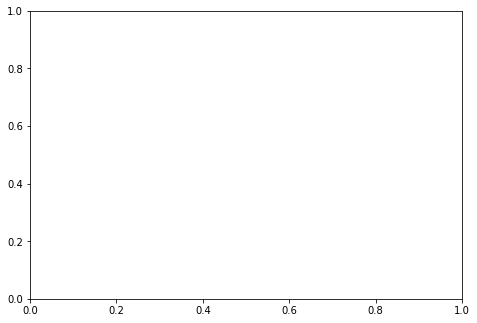

In [9]:
analyzer = XRDAnalyzer(df_exp_data)
fit_fig = analyzer.fit()

In [10]:
fit_fig.suptitle('')
fit_fig.savefig('hallo', dpi=600)
